In [82]:
import numpy as np
import pandas as pd
from statsbombpy import sb
import networkx as nx

In [3]:
sb.competitions()

c:\users\lawrence\appdata\local\programs\python\python39\lib\site-packages\statsbombpy\api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [69]:
sb.matches(competition_id = 11,season_id = 90).columns

c:\users\lawrence\appdata\local\programs\python\python39\lib\site-packages\statsbombpy\api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')

In [18]:
sb.events(match_id=3773477,flatten_attrs=True).columns


c:\users\lawrence\appdata\local\programs\python\python39\lib\site-packages\statsbombpy\api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_save_block', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_penalty', 'foul_committed_type',
       'foul_won_advantage', 'foul_won_defensive', 'foul_won_penalty',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_

In [108]:
match = sb.events(match_id=3773477)

In [123]:
#match.shot_freeze_frame.dropna().apply(pd.Series)[0].apply(pd.Series)

array([nan, True], dtype=object)

In [125]:
events = match[['minute','second','team','type','location','pass_end_location','player','pass_recipient','pass_outcome','pass_length','pass_shot_assist','pass_goal_assist']]

array([nan, True], dtype=object)

In [63]:
events.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Interception', 'Pressure', 'Dispossessed', 'Duel',
       'Ball Recovery', 'Miscontrol', 'Block', 'Foul Committed',
       'Foul Won', 'Dribbled Past', 'Dribble', 'Shot', 'Goal Keeper',
       'Shield', 'Clearance', 'Error', 'Injury Stoppage', 'Half End',
       'Substitution', 'Tactical Shift'], dtype=object)

In [71]:
barcelona_passes = events[(events.type == 'Pass') & (events.team == 'Barcelona')]
barcelona_passes

,minute,second,team,type,location,pass_end_location,player,pass_recipient,pass_outcome,pass_length,pass_goal_assist
8,0,8,Barcelona,Pass,"[47.8, 26.3]","[12.9, 36.8]",Sergio Busquets i Burgos,Marc-André ter Stegen,NaN,36.445300,NaN
9,0,12,Barcelona,Pass,"[11.5, 37.3]","[20.2, 19.3]",Marc-André ter Stegen,Clément Lenglet,NaN,19.992249,NaN
10,0,18,Barcelona,Pass,"[31.5, 19.3]","[22.7, 41.1]",Clément Lenglet,Gerard Piqué Bernabéu,NaN,23.509148,NaN
11,0,21,Barcelona,Pass,"[22.8, 40.3]","[28.4, 18.4]",Gerard Piqué Bernabéu,Clément Lenglet,NaN,22.604645,NaN
12,0,24,Barcelona,Pass,"[35.2, 16.8]","[55.5, 15.7]",Clément Lenglet,Pedro González López,NaN,20.329780,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1095,94,1,Barcelona,Pass,"[70.8, 0.1]","[77.7, 12.2]",Jordi Alba Ramos,Pedro González López,NaN,13.929106,NaN
1096,94,3,Barcelona,Pass,"[76.9, 12.3]","[63.6, 26.3]",Pedro González López,Miralem Pjanić,NaN,19.310360,NaN
1097,94,6,Barcelona,Pass,"[63.1, 28.5]","[65.2, 54.6]",Miralem Pjanić,Lionel Andrés Messi Cuccittini,NaN,26.184347,NaN
1098,94,8,Barcelona,Pass,"[69.4, 54.4]","[110.1, 37.0]",Lionel Andrés Messi Cuccittini,Frenkie de Jong,Incomplete,44.263416,NaN


In [128]:
#Bear in mind not considering impact of substitutions
barcelona_players = barcelona_passes.player.unique()
#Number of players who passed
barcelona_players.shape

(15,)

In [87]:
DG = nx.DiGraph()
DG.add_nodes_from(barcelona_players)
DG.nodes()

NodeView(('Sergio Busquets i Burgos', 'Marc-André ter Stegen', 'Clément Lenglet', 'Gerard Piqué Bernabéu', 'Pedro González López', 'Frenkie de Jong', 'Jordi Alba Ramos', 'Sergi Roberto Carnicer', 'Ousmane Dembélé', 'Antoine Griezmann', 'Anssumane Fati', 'Lionel Andrés Messi Cuccittini', 'Francisco António Machado Mota de Castro Trincão', 'Martin Braithwaite Christensen', 'Miralem Pjanić'))

In [139]:
edges = barcelona_passes[['player','pass_recipient','pass_length']]
#for i in edges.iterrows():
#   print(i)

#for player,recipient,length in edges.items():
    #print(player)
for i,row in enumerate(edges.itertuples()):
    DG.add_edge(row.player,row.pass_recipient,weight=row.pass_length)
    #print(row.player,row.pass_recipient,row.pass_length)

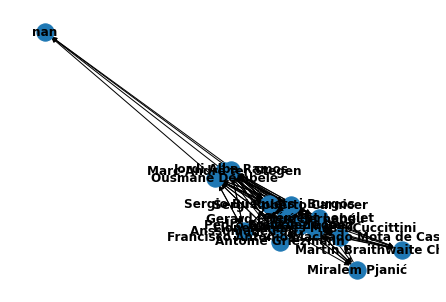

In [142]:
nx.draw(DG,with_labels=True,font_weight='bold')